In [20]:
# import all library
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA #Principal Component Analysis
from imblearn.over_sampling import SMOTE # Synthetic Minority Over-sampling Technique
from imblearn.under_sampling import RandomUnderSampler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,accuracy_score,confusion_matrix
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [21]:
#read the data set
df=pd.read_csv('/content/drive/MyDrive/Python data set panda/creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [22]:
# check the missing values
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [23]:
# check the datatypes of the features
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [24]:
#check out its a imbalanced dataset
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

<Axes: xlabel='Class', ylabel='count'>

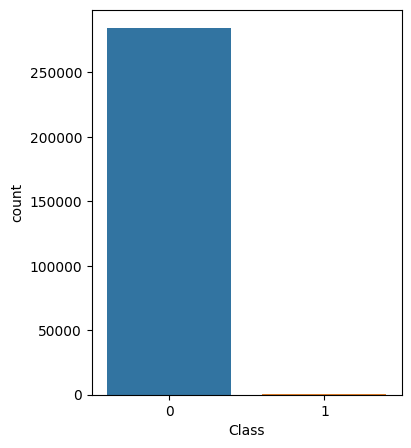

In [25]:
#check out its a imbalanced dataset using graph
fig,ax = plt.subplots(figsize=(4,5))
sns.countplot(x='Class',data=df,ax=ax)

In [26]:
#arrrange the true and false of detection for get proper data
df1=df.loc[df['Class']==1]
df2=df.loc[df['Class']==0]
df = pd.concat([df1, df2], ignore_index=True)
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [27]:
# reduce dataset for the decreases the execution time
df=df.iloc[:50000,:]

In [28]:
# find out the correlation between each features  to eliminate unwanted features
df.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,-0.054240,-0.038613,-0.180996,0.063519,-0.093938,-0.037613,-0.099473,0.016845,-0.356131,...,0.035322,0.055703,0.001911,-0.016510,0.015203,-0.021475,-0.021042,0.011489,0.073302,0.346602
V1,-0.054240,1.000000,-0.101485,0.363265,-0.141441,0.145936,0.107349,0.258712,-0.031757,0.016701,...,-0.038833,-0.039572,-0.086752,-0.010977,0.174781,0.028918,-0.010794,0.079304,-0.224575,-0.230203
V2,-0.038613,-0.101485,1.000000,-0.264086,0.141016,-0.157238,-0.013390,-0.162444,0.018323,-0.058514,...,0.007959,-0.050409,0.007690,-0.020531,-0.096248,-0.038318,0.030013,-0.071278,-0.517688,0.213791
V3,-0.180996,0.363265,-0.264086,1.000000,-0.224310,0.355879,0.018392,0.444444,-0.176078,0.230089,...,0.002901,0.183909,0.030403,0.021746,-0.145395,0.049477,-0.052924,0.034377,-0.173435,-0.460831
V4,0.063519,-0.141441,0.141016,-0.224310,1.000000,-0.094514,-0.068831,-0.173748,0.062328,-0.055595,...,0.012642,0.023913,0.000910,-0.010528,-0.020278,0.013514,0.029474,0.006730,0.089315,0.298448
V5,-0.093938,0.145936,-0.157238,0.355879,-0.094514,1.000000,0.075342,0.155192,-0.066643,0.106137,...,-0.039978,-0.081345,0.009217,-0.017389,-0.021133,-0.036314,-0.037712,0.057213,-0.371972,-0.196615
V6,-0.037613,0.107349,-0.013390,0.018392,-0.068831,0.075342,1.000000,0.105564,-0.083254,0.057406,...,0.033375,0.016611,-0.007774,0.010976,0.053338,0.012269,-0.010840,-0.049116,0.212312,-0.112982
V7,-0.099473,0.258712,-0.162444,0.444444,-0.173748,0.155192,0.105564,1.000000,-0.017919,0.151693,...,-0.025824,-0.038615,0.036446,-0.003828,-0.072558,-0.029064,-0.026914,-0.054569,0.321802,-0.371939
V8,0.016845,-0.031757,0.018323,-0.176078,0.062328,-0.066643,-0.083254,-0.017919,1.000000,-0.046848,...,-0.082810,0.048819,-0.076785,0.007785,0.033783,0.006217,0.071998,0.031316,-0.078167,0.038720
V9,-0.356131,0.016701,-0.058514,0.230089,-0.055595,0.106137,0.057406,0.151693,-0.046848,1.000000,...,-0.003511,-0.002290,-0.044284,0.008364,0.110907,0.090262,-0.013704,-0.021657,-0.021672,-0.216311


<Axes: >

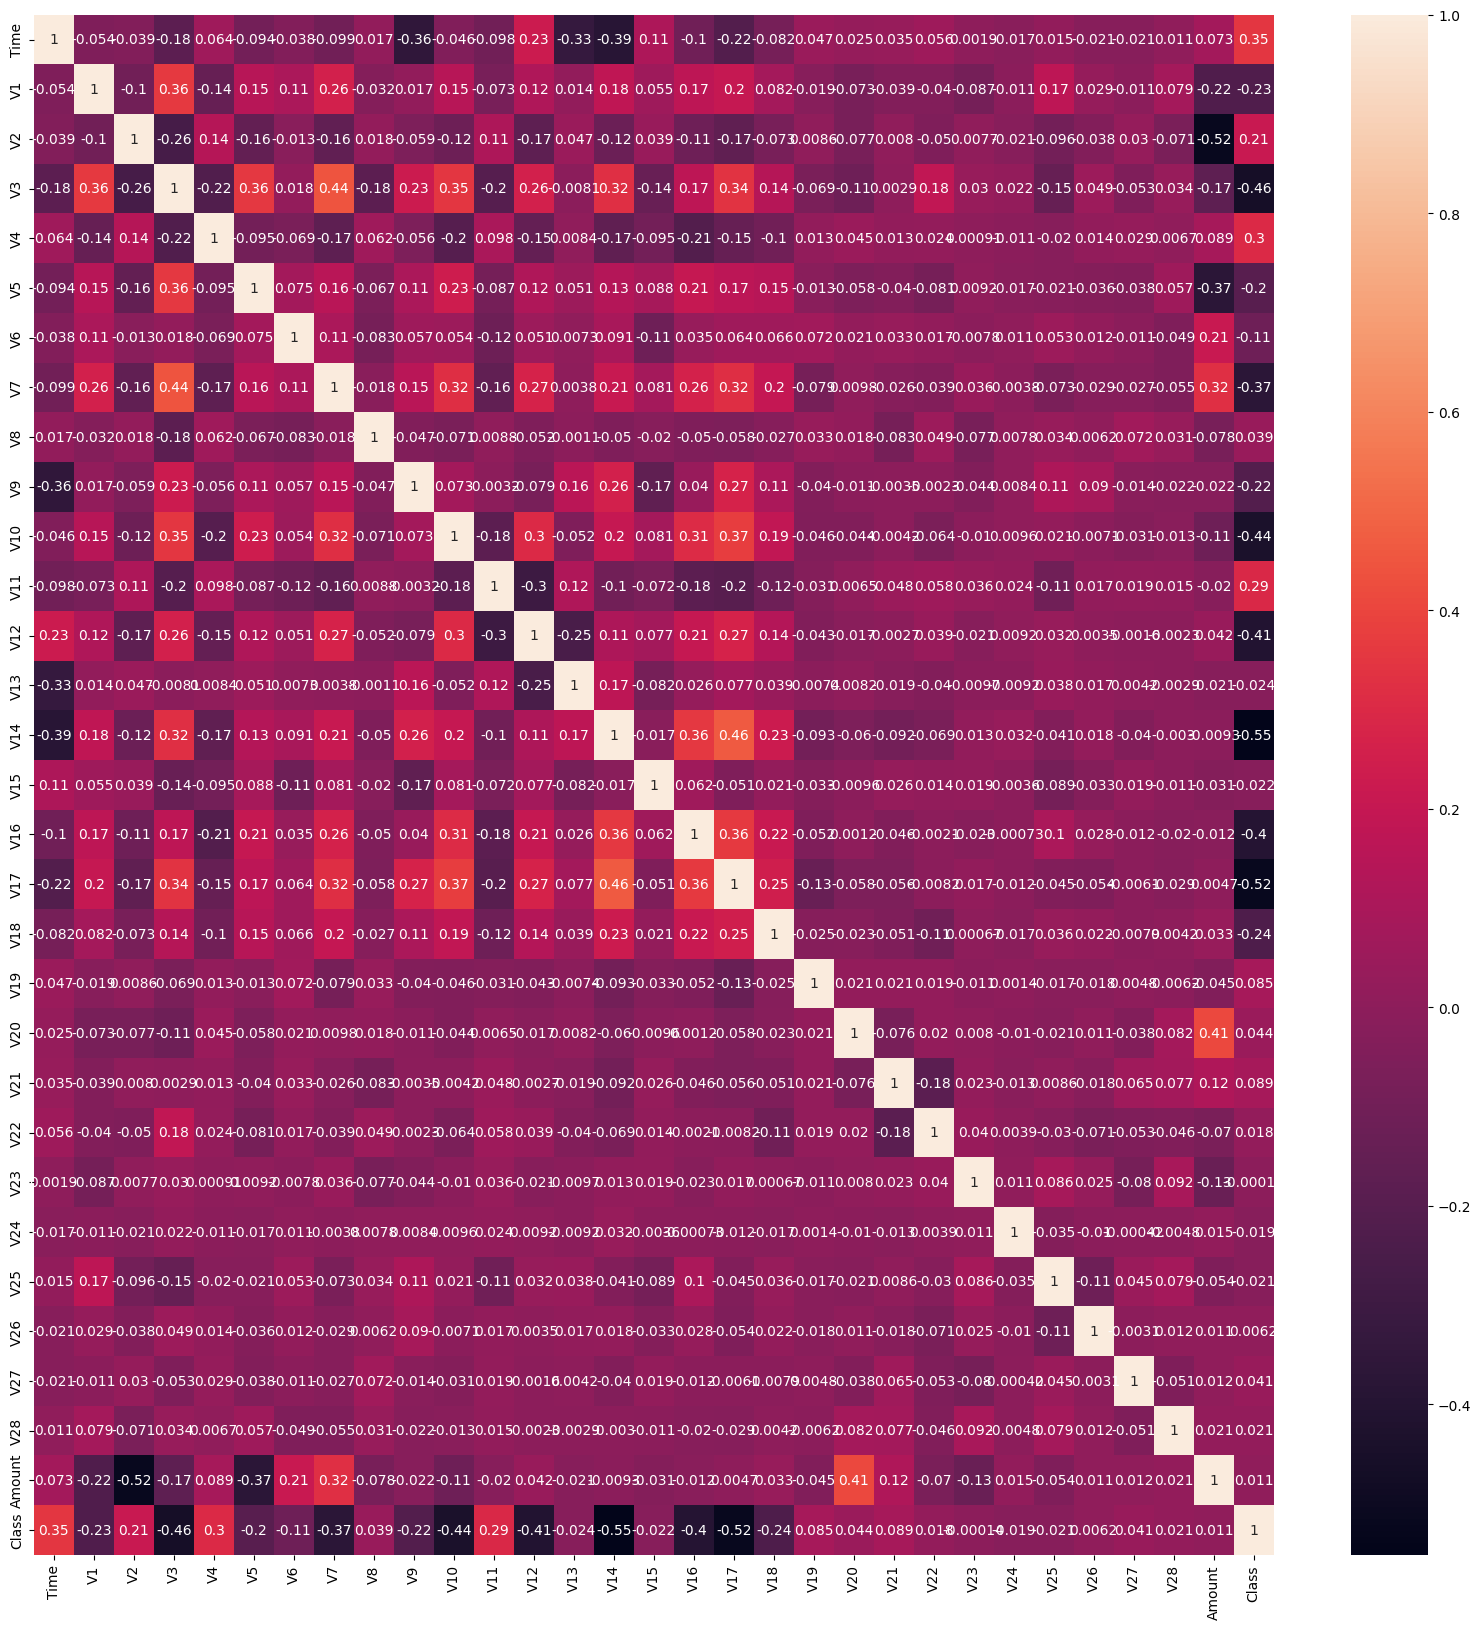

In [29]:
# find out the correlation between each features to eliminate unwanted features uing heatmap
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

In [30]:
# split the target values and other features
X=df.iloc[:,:-1]
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00
1,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00
2,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93
3,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00
4,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,44150.0,0.272230,-1.575926,-0.128112,0.437437,-1.135635,-0.787169,0.580012,-0.204372,-0.103522,...,0.904239,0.130273,-0.829654,-0.308244,0.582290,-0.087132,0.734134,-0.186983,0.082444,501.84
49996,44151.0,0.997463,-1.842650,0.323073,-1.327006,-1.738335,-0.310462,-0.849820,-0.076499,-2.016502,...,0.213781,-0.185868,-0.785903,-0.095373,-0.027702,0.055280,-0.434496,-0.008246,0.060261,264.30
49997,44151.0,0.585965,-2.378620,0.341736,-1.116573,-1.929169,-0.076195,-0.645417,-0.053700,-2.171135,...,0.553232,-0.012105,-0.611780,-0.159277,0.206371,-0.130762,-0.457545,-0.019279,0.093301,435.70
49998,44151.0,0.895659,-0.995167,1.078410,0.446763,-0.684882,2.131188,-1.311335,0.814080,-0.557802,...,-0.551505,-0.176536,0.011538,0.142969,-1.085915,-0.125232,-0.290696,0.141120,0.030252,84.00


In [31]:
# split the target values
y=df.iloc[:,-1]
y

0        1
1        1
2        1
3        1
4        1
        ..
49995    0
49996    0
49997    0
49998    0
49999    0
Name: Class, Length: 50000, dtype: int64

In [32]:
#check out its a imbalanced dataset after reduce data
y.value_counts()

0    49508
1      492
Name: Class, dtype: int64

<Axes: xlabel='Class', ylabel='count'>

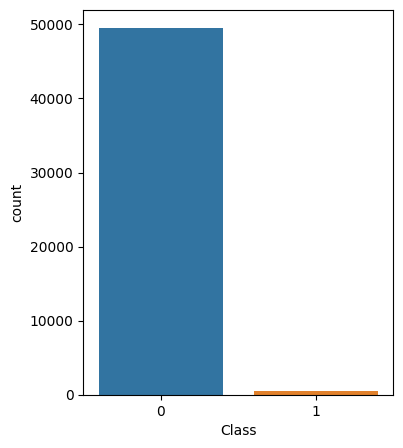

In [33]:
#check out its a imbalanced dataset using graph after reduce data
fig,ax = plt.subplots(figsize=(4,5))
sns.countplot(x='Class',data=df,ax=ax)

In [34]:
#split data into train and test data set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [35]:
#scale data using MinMaxScaler
sc=MinMaxScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)


In [36]:
# apply pca for reduce the features
pca=PCA(n_components=8,random_state=1)
X_train=pca.fit_transform(X_train)
X_test = pca.transform(X_test)
X_train

array([[ 0.29127777,  0.2519777 ,  0.04345956, ..., -0.04853064,
        -0.04119176, -0.05088569],
       [-0.04058839,  0.20188359,  0.00230433, ..., -0.07310993,
         0.01410313, -0.04629004],
       [-0.13866913,  0.06894946, -0.02616536, ..., -0.00854258,
        -0.05732146, -0.03177274],
       ...,
       [ 0.32907707, -0.02118992, -0.01874154, ...,  0.03935046,
        -0.0139913 ,  0.01545199],
       [ 0.26787007, -0.11502164,  0.03496891, ...,  0.12045743,
         0.0573087 , -0.0077672 ],
       [-0.09127329,  0.00354952,  0.04541699, ...,  0.01471607,
         0.11969416,  0.08066971]])

In [37]:
pca.explained_variance_ratio_

array([0.20966626, 0.10192779, 0.09821431, 0.09336936, 0.07882092,
       0.07010278, 0.06492576, 0.04336811])

In [38]:
#hyper parameter tunning
kn=KNeighborsClassifier()
params={'n_neighbors':[3,5,7,9],'weights':['uniform','distance'],'algorithm':['auto','ball_tree','kd_tree','brute']}
clf=GridSearchCV(kn,params,cv=10,scoring='accuracy')
clf.fit(X_train,y_train)
print(clf.best_params_)

{'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'uniform'}


******************** KNeighborsClassifier(n_neighbors=3) ********************
99.89333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14857
           1       0.98      0.90      0.94       143

    accuracy                           1.00     15000
   macro avg       0.99      0.95      0.97     15000
weighted avg       1.00      1.00      1.00     15000

________________________________________________________________________________________________________________________________________________________________________________________________________
******************** GaussianNB() ********************
99.73333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14857
           1       0.87      0.85      0.86       143

    accuracy                           1.00     15000
   macro avg       0.93      0.93      0.93     15000
weighted avg       1.00      1.

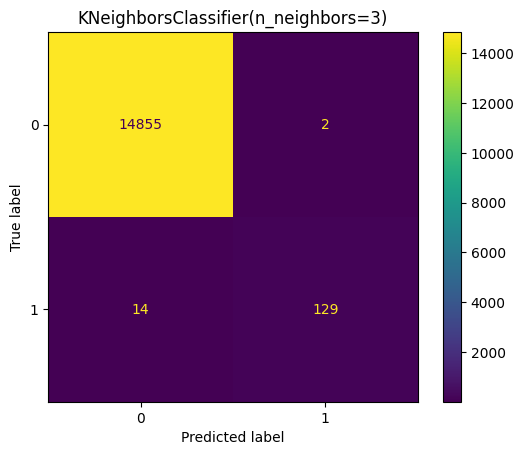

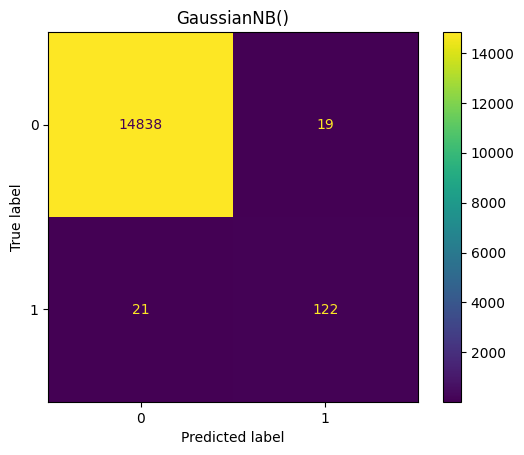

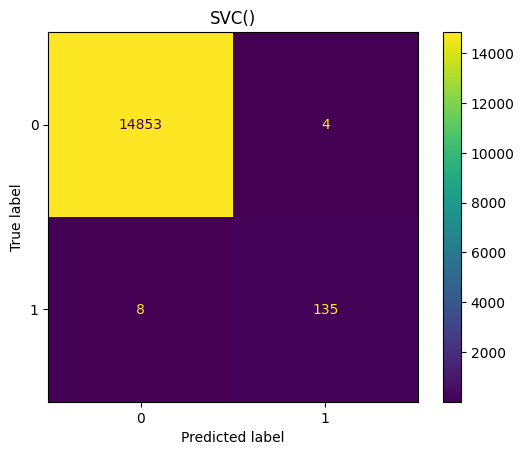

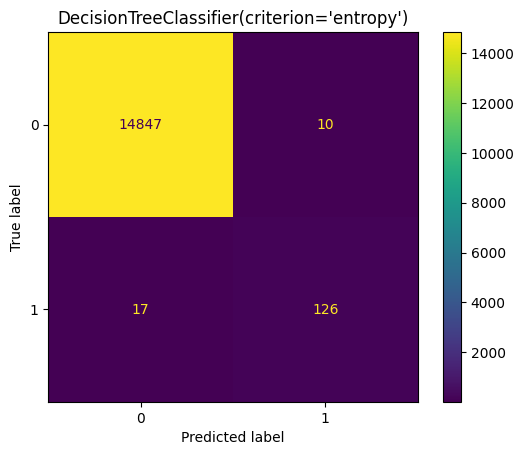

In [39]:
#apply classifier algorithm
modelPerformance = pd.DataFrame(columns=['Algorithm', 'Prediction_Accuracy',])
knn=KNeighborsClassifier(n_neighbors=3,algorithm='auto',weights='uniform')
nb=GaussianNB()
sv=SVC()
dt=DecisionTreeClassifier(criterion='entropy')
models=[knn,nb,sv,dt]
for model in models:
  print("*"*20,model,"*"*20)
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  new_row = pd.Series([model,accuracy_score(y_test,y_pred)*100], index=modelPerformance.columns)
  modelPerformance = modelPerformance.append(new_row, ignore_index=True)
  print(accuracy_score(y_test,y_pred)*100)
  print(classification_report(y_test,y_pred))
  cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
  disp.plot()
  disp.ax_.set_title(model)
  print("_"*200)

#################### AdaBoostClassifier() ####################
accuracy= 99.8
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14857
           1       0.94      0.84      0.89       143

    accuracy                           1.00     15000
   macro avg       0.97      0.92      0.94     15000
weighted avg       1.00      1.00      1.00     15000

#################### GradientBoostingClassifier() ####################
accuracy= 99.74666666666666
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14857
           1       0.89      0.83      0.86       143

    accuracy                           1.00     15000
   macro avg       0.95      0.92      0.93     15000
weighted avg       1.00      1.00      1.00     15000

#################### XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_by

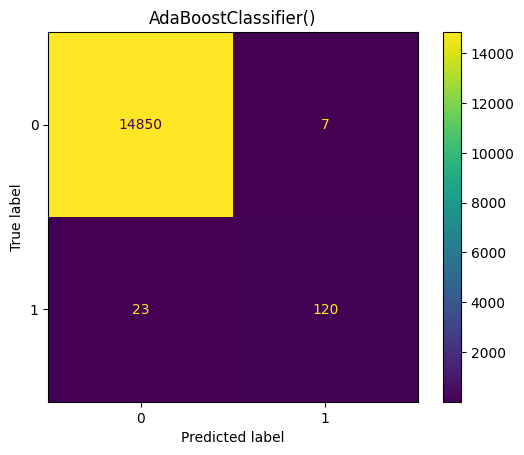

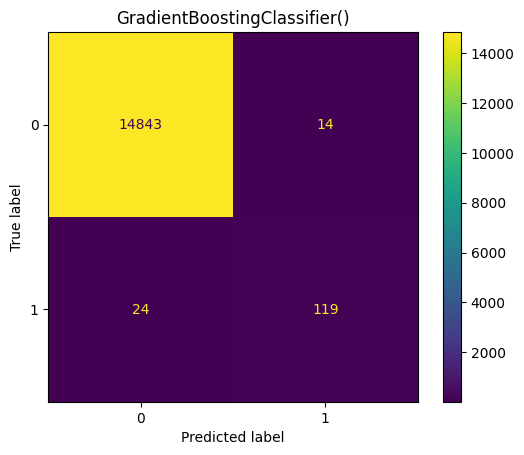

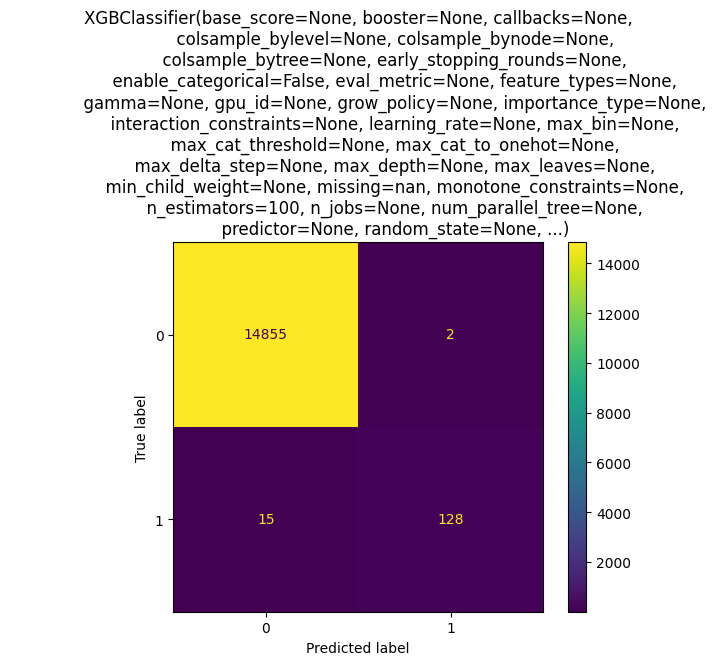

In [40]:
#apply boosting classifier algorithm
ab=AdaBoostClassifier()
gb=GradientBoostingClassifier()
xb=XGBClassifier()
models=[ab,gb,xb]
for model in models:
  print("#"*20,model,"#"*20)
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  new_row = pd.Series([model,accuracy_score(y_test,y_pred)*100], index=modelPerformance.columns)
  modelPerformance = modelPerformance.append(new_row, ignore_index=True)
  print("accuracy=",accuracy_score(y_test,y_pred)*100)
  print(classification_report(y_test,y_pred))
  cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
  disp.plot()
  disp.ax_.set_title(model)

In [41]:
#predict label using one sample of feature
y_new=df.iloc[2:3,:-1]
y_new=sc.transform(y_new)
y_new=pca.transform(y_new)
knnus=KNeighborsClassifier(n_neighbors=5,algorithm='auto',weights='uniform')
nbus=GaussianNB()
svus=SVC()
ab=AdaBoostClassifier()
gb=GradientBoostingClassifier()
xb=XGBClassifier()
dtus=DecisionTreeClassifier(criterion='entropy')
models=[knnus,nbus,svus,dtus,ab,gb,xb]
for model in models:
  print("*"*20,model,"*"*20)
  model.fit(X_train,y_train)
  y_pred=model.predict(y_new)
  if(y_pred==1):
    print("Credit_card fraud detected ")
  else:
    print("Credit_card fraud not detected ")
  print("_"*200)

******************** KNeighborsClassifier() ********************
Credit_card fraud detected 
________________________________________________________________________________________________________________________________________________________________________________________________________
******************** GaussianNB() ********************
Credit_card fraud detected 
________________________________________________________________________________________________________________________________________________________________________________________________________
******************** SVC() ********************
Credit_card fraud detected 
________________________________________________________________________________________________________________________________________________________________________________________________________
******************** DecisionTreeClassifier(criterion='entropy') ********************
Credit_card fraud detected 
_______________________________

In [42]:
modelPerformance=modelPerformance.sort_values(['Prediction_Accuracy'],axis=0, ignore_index=True,ascending=False)
modelPerformance.style.highlight_max(subset=['Prediction_Accuracy'],color='green')

,Algorithm,Prediction_Accuracy
0,SVC(),99.920000
1,KNeighborsClassifier(n_neighbors=3),99.893333
2,"XGBClassifier(base_score=None, booster=None, callbacks=None, colsample_bylevel=None, colsample_bynode=None, colsample_bytree=None, early_stopping_rounds=None, enable_categorical=False, eval_metric=None, feature_types=None, gamma=None, gpu_id=None, grow_policy=None, importance_type=None, interaction_constraints=None, learning_rate=None, max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=None, max_depth=None, max_leaves=None, min_child_weight=None, missing=nan, monotone_constraints=None, n_estimators=100, n_jobs=None, num_parallel_tree=None, predictor=None, random_state=None, ...)",99.886667
3,DecisionTreeClassifier(criterion='entropy'),99.820000
4,AdaBoostClassifier(),99.800000
5,GradientBoostingClassifier(),99.746667
6,GaussianNB(),99.733333


In [43]:
modelPerformance.style.highlight_min(subset=['Prediction_Accuracy'],color='red')

,Algorithm,Prediction_Accuracy
0,SVC(),99.920000
1,KNeighborsClassifier(n_neighbors=3),99.893333
2,"XGBClassifier(base_score=None, booster=None, callbacks=None, colsample_bylevel=None, colsample_bynode=None, colsample_bytree=None, early_stopping_rounds=None, enable_categorical=False, eval_metric=None, feature_types=None, gamma=None, gpu_id=None, grow_policy=None, importance_type=None, interaction_constraints=None, learning_rate=None, max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=None, max_depth=None, max_leaves=None, min_child_weight=None, missing=nan, monotone_constraints=None, n_estimators=100, n_jobs=None, num_parallel_tree=None, predictor=None, random_state=None, ...)",99.886667
3,DecisionTreeClassifier(criterion='entropy'),99.820000
4,AdaBoostClassifier(),99.800000
5,GradientBoostingClassifier(),99.746667
6,GaussianNB(),99.733333


# ***Oversampling***

In [44]:
# oversampling using smote algorithm
os=SMOTE()
X_os,y_os=os.fit_resample(X,y)

In [45]:
y_os.value_counts()

1    49508
0    49508
Name: Class, dtype: int64

In [46]:
X_train_os,X_test_os,y_train_os,y_test_os=train_test_split(X_os,y_os,test_size=0.3,random_state=1)

In [47]:
sc=MinMaxScaler()
X_train_os=sc.fit_transform(X_train_os)
X_test_os=sc.transform(X_test_os)

In [48]:
pca=PCA(n_components=8,random_state=1)
X_train_os=pca.fit_transform(X_train_os)
X_test_os = pca.transform(X_test_os)
X_train_os

array([[-0.34986982, -0.06645725,  0.07800591, ..., -0.14731588,
         0.06456989, -0.10192017],
       [-0.41796348, -0.05487381,  0.05503857, ...,  0.03364157,
         0.01392636, -0.15870213],
       [-0.40194803, -0.02361731,  0.03954553, ...,  0.03214764,
        -0.02731661,  0.09873359],
       ...,
       [-0.37250468, -0.30674995, -0.01094059, ...,  0.02279824,
         0.05644966, -0.00667257],
       [ 0.6615995 , -0.24600103, -0.02687762, ..., -0.01708656,
        -0.02443082,  0.01293131],
       [ 0.41780324, -0.05008156, -0.17101391, ...,  0.06086217,
        -0.11470748,  0.01539064]])

In [49]:
pca.explained_variance_ratio_

array([0.55277063, 0.14966504, 0.05830921, 0.04465478, 0.03755295,
       0.02807475, 0.0220485 , 0.01687107])

In [50]:
#hyper parameter tunning
knos=KNeighborsClassifier()
params={'n_neighbors':[3,5,7,9],'weights':['uniform','distance'],'algorithm':['auto','ball_tree','kd_tree','brute']}
clf=GridSearchCV(knos,params,cv=10,scoring='accuracy')
clf.fit(X_train_os,y_train_os)
print(clf.best_params_)

{'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'distance'}


******************** KNeighborsClassifier(n_neighbors=3, weights='distance') ********************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14951
           1       1.00      1.00      1.00     14754

    accuracy                           1.00     29705
   macro avg       1.00      1.00      1.00     29705
weighted avg       1.00      1.00      1.00     29705

accuracy= 99.94950345059755
________________________________________________________________________________________________________________________________________________________________________________________________________
******************** GaussianNB() ********************
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     14951
           1       0.98      0.96      0.97     14754

    accuracy                           0.97     29705
   macro avg       0.97      0.97      0.97     29705
weighted avg       

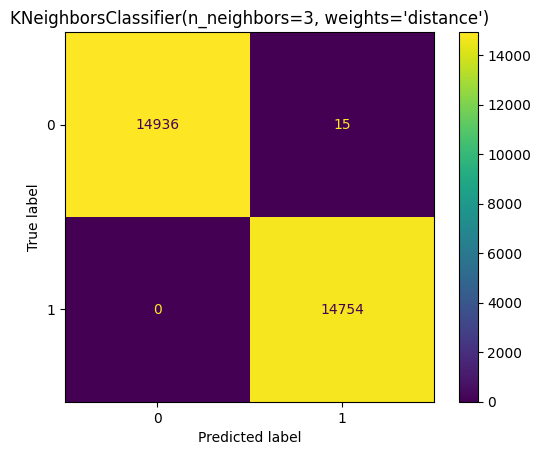

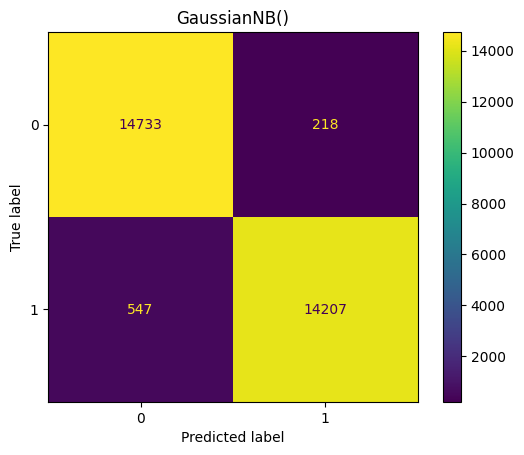

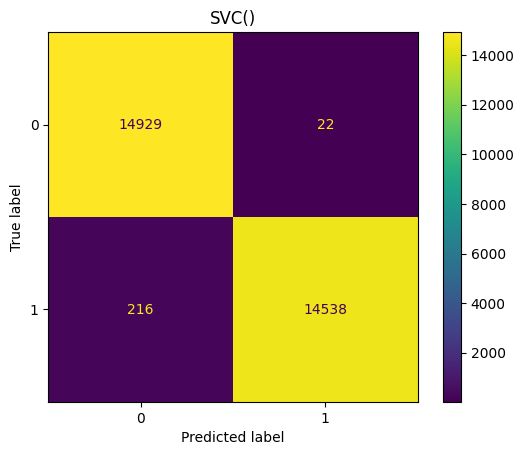

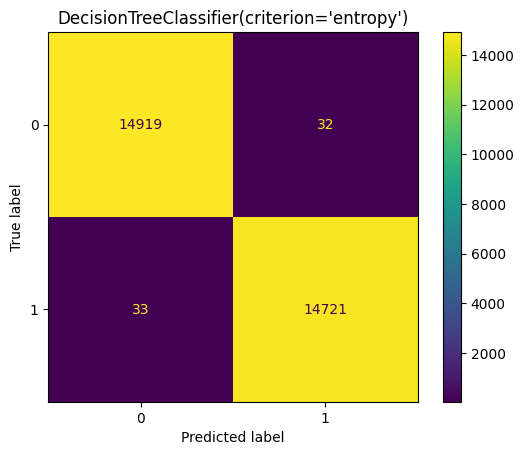

In [51]:
knnos=KNeighborsClassifier(n_neighbors=3,algorithm='auto',weights='distance')
nbos=GaussianNB()
svos=SVC()
dtos=DecisionTreeClassifier(criterion='entropy')
models=[knnos,nbos,svos,dtos]
modelPerformance_os = pd.DataFrame(columns=['Algorithm', 'Prediction_Accuracy',])
for model in models:
  print("*"*20,model,"*"*20)
  model.fit(X_train_os,y_train_os)
  y_pred_os=model.predict(X_test_os)
  print(classification_report(y_test_os,y_pred_os))
  new_row_os = pd.Series([model,accuracy_score(y_test_os,y_pred_os)*100], index=modelPerformance_os.columns)
  modelPerformance_os = modelPerformance_os.append(new_row_os, ignore_index=True)
  print("accuracy=",accuracy_score(y_test_os,y_pred_os)*100)
  cm = confusion_matrix(y_test_os, y_pred_os, labels=model.classes_)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
  disp.plot()
  disp.ax_.set_title(model)
  print("_"*200)

#################### AdaBoostClassifier() ####################
accuracy= 99.18532233630701
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     14951
           1       0.99      0.99      0.99     14754

    accuracy                           0.99     29705
   macro avg       0.99      0.99      0.99     29705
weighted avg       0.99      0.99      0.99     29705

#################### GradientBoostingClassifier() ####################
accuracy= 99.46810301296078
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     14951
           1       1.00      0.99      0.99     14754

    accuracy                           0.99     29705
   macro avg       0.99      0.99      0.99     29705
weighted avg       0.99      0.99      0.99     29705

#################### XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
             

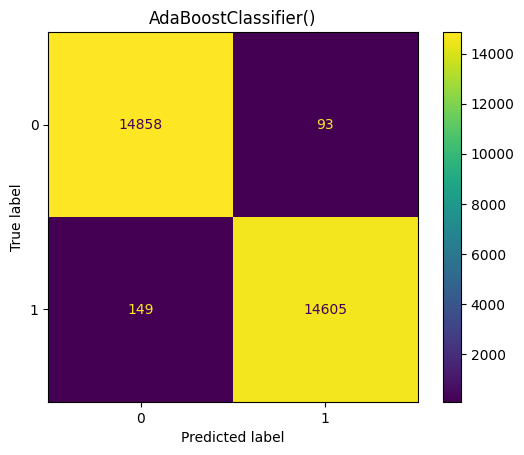

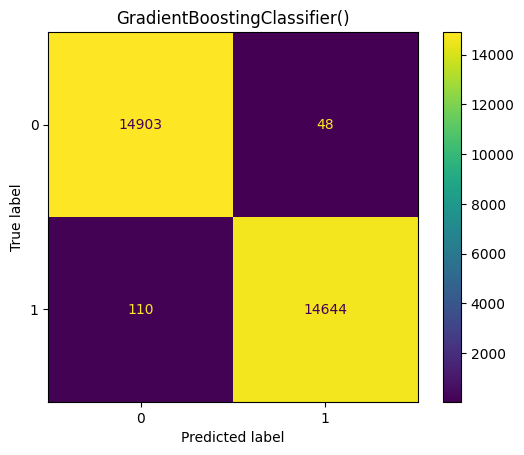

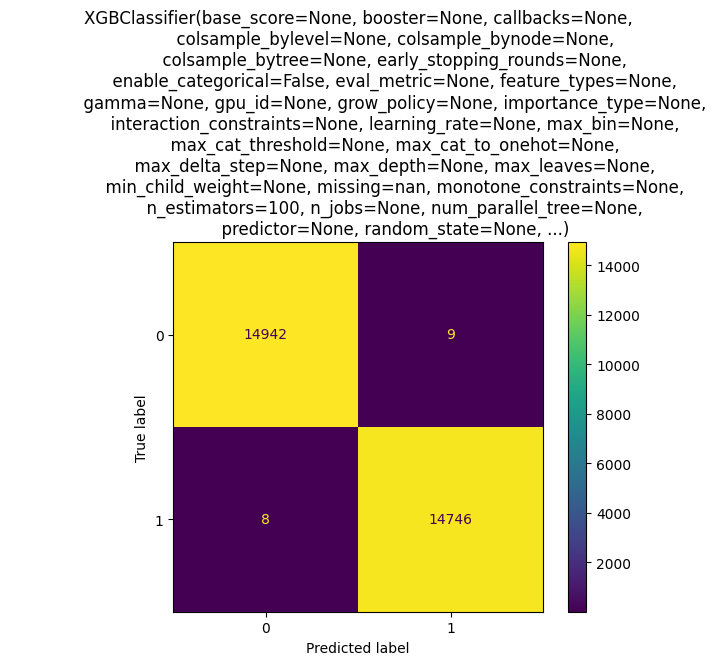

In [52]:
ab=AdaBoostClassifier()
gb=GradientBoostingClassifier()
xb=XGBClassifier()
models=[ab,gb,xb]
for model in models:
  print("#"*20,model,"#"*20)
  model.fit(X_train_os,y_train_os)
  y_pred_os=model.predict(X_test_os)
  new_row_os = pd.Series([model,accuracy_score(y_test_os,y_pred_os)*100], index=modelPerformance_os.columns)
  modelPerformance_os = modelPerformance_os.append(new_row_os, ignore_index=True)
  print("accuracy=",accuracy_score(y_test_os,y_pred_os)*100)
  print(classification_report(y_test_os,y_pred_os))
  cm = confusion_matrix(y_test_os, y_pred_os, labels=model.classes_)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
  disp.plot()
  disp.ax_.set_title(model)

In [53]:
modelPerformance_os=modelPerformance_os.sort_values(['Prediction_Accuracy'],axis=0, ignore_index=True,ascending=False)
modelPerformance_os.style.highlight_max(subset=['Prediction_Accuracy'],color='green')

,Algorithm,Prediction_Accuracy
0,"KNeighborsClassifier(n_neighbors=3, weights='distance')",99.949503
1,"XGBClassifier(base_score=None, booster=None, callbacks=None, colsample_bylevel=None, colsample_bynode=None, colsample_bytree=None, early_stopping_rounds=None, enable_categorical=False, eval_metric=None, feature_types=None, gamma=None, gpu_id=None, grow_policy=None, importance_type=None, interaction_constraints=None, learning_rate=None, max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=None, max_depth=None, max_leaves=None, min_child_weight=None, missing=nan, monotone_constraints=None, n_estimators=100, n_jobs=None, num_parallel_tree=None, predictor=None, random_state=None, ...)",99.942771
2,DecisionTreeClassifier(criterion='entropy'),99.781182
3,GradientBoostingClassifier(),99.468103
4,SVC(),99.198788
5,AdaBoostClassifier(),99.185322
6,GaussianNB(),97.424676


In [54]:
modelPerformance_os.style.highlight_min(subset=['Prediction_Accuracy'],color='red')

,Algorithm,Prediction_Accuracy
0,"KNeighborsClassifier(n_neighbors=3, weights='distance')",99.949503
1,"XGBClassifier(base_score=None, booster=None, callbacks=None, colsample_bylevel=None, colsample_bynode=None, colsample_bytree=None, early_stopping_rounds=None, enable_categorical=False, eval_metric=None, feature_types=None, gamma=None, gpu_id=None, grow_policy=None, importance_type=None, interaction_constraints=None, learning_rate=None, max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=None, max_depth=None, max_leaves=None, min_child_weight=None, missing=nan, monotone_constraints=None, n_estimators=100, n_jobs=None, num_parallel_tree=None, predictor=None, random_state=None, ...)",99.942771
2,DecisionTreeClassifier(criterion='entropy'),99.781182
3,GradientBoostingClassifier(),99.468103
4,SVC(),99.198788
5,AdaBoostClassifier(),99.185322
6,GaussianNB(),97.424676


# ***Under Sampling***

In [55]:
#apply the RandomUndersampler algorithm
us=RandomUnderSampler(random_state=1)
X_us,y_us=us.fit_resample(X,y)

In [56]:
X_train_us,X_test_us,y_train_us,y_test_us=train_test_split(X_us,y_us,test_size=0.3,random_state=1)

In [57]:
sc=MinMaxScaler()
X_train_us=sc.fit_transform(X_train_us)
X_test_us=sc.transform(X_test_us)

In [58]:
pca=PCA(n_components=8,random_state=1)
X_train_us=pca.fit_transform(X_train_us)
X_test_us = pca.transform(X_test_us)
X_train_us

array([[-1.96243021e-01,  5.45888910e-01, -4.62095516e-02, ...,
        -4.22853559e-02,  3.28273624e-01,  1.37572256e-01],
       [-3.62546952e-01,  1.01002972e-01,  5.21966701e-02, ...,
        -1.72237419e-03,  2.23849678e-01,  1.50353755e-01],
       [ 1.33414905e+00, -4.70968716e-01,  4.81400044e-01, ...,
         8.97786161e-02,  1.63435346e-01,  1.11950828e-01],
       ...,
       [ 3.59418790e-01,  4.83335541e-01,  1.39548242e-01, ...,
        -7.09278550e-02, -8.66642715e-02,  5.57474584e-02],
       [-4.46767803e-01, -9.40111466e-04,  6.00181807e-02, ...,
        -1.47368873e-01,  6.45958641e-02, -7.32192459e-02],
       [-4.38308547e-01, -2.40259386e-01, -1.26071897e-01, ...,
        -1.20997457e-01,  8.16432977e-02,  6.79431561e-02]])

In [59]:
pca.explained_variance_ratio_

array([0.49710966, 0.10522403, 0.06269533, 0.05404646, 0.03908624,
       0.03598851, 0.03416232, 0.0307622 ])

In [60]:
#hyper parameter tunning
knos=KNeighborsClassifier()
params={'n_neighbors':[3,5,7,9],'weights':['uniform','distance'],'algorithm':['auto','ball_tree','kd_tree','brute']}
clf=GridSearchCV(knos,params,cv=10,scoring='accuracy')
clf.fit(X_train_us,y_train_us)
print(clf.best_params_)

{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'uniform'}


******************** KNeighborsClassifier(n_neighbors=3) ********************
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       142
           1       1.00      0.94      0.97       154

    accuracy                           0.97       296
   macro avg       0.97      0.97      0.97       296
weighted avg       0.97      0.97      0.97       296

accuracy= 0.9695945945945946
________________________________________________________________________________________________________________________________________________________________________________________________________
******************** GaussianNB() ********************
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       142
           1       0.99      0.94      0.96       154

    accuracy                           0.96       296
   macro avg       0.96      0.96      0.96       296
weighted avg       0.96      0.96     

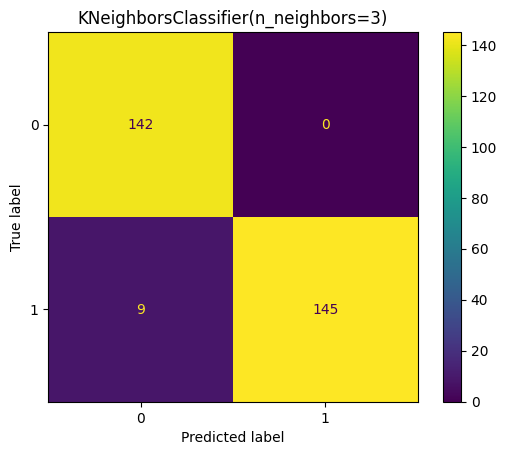

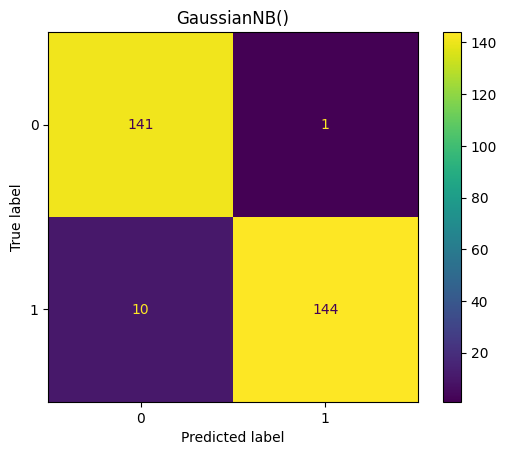

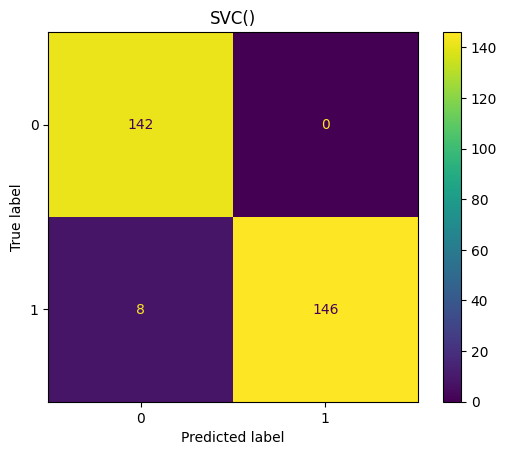

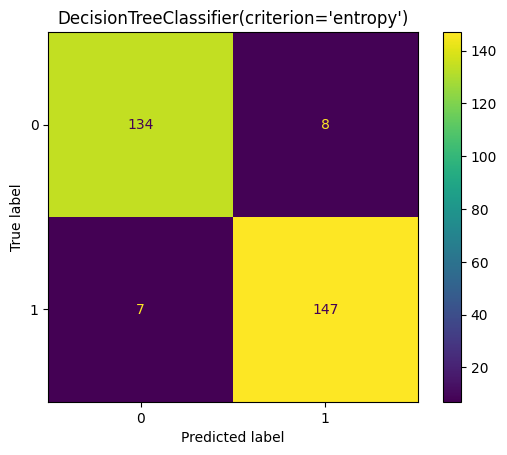

In [61]:
knnus=KNeighborsClassifier(n_neighbors=3,algorithm='auto',weights='uniform')
nbus=GaussianNB()
svus=SVC()
dtus=DecisionTreeClassifier(criterion='entropy')
models=[knnus,nbus,svus,dtus]
modelPerformance_us = pd.DataFrame(columns=['Algorithm', 'Prediction_Accuracy',])
for model in models:
  print("*"*20,model,"*"*20)
  model.fit(X_train_us,y_train_us)
  y_pred_us=model.predict(X_test_us)
  new_row_us = pd.Series([model,accuracy_score(y_test_us,y_pred_us)*100], index=modelPerformance_us.columns)
  modelPerformance_us = modelPerformance_us.append(new_row_us, ignore_index=True)
  print(classification_report(y_test_us,y_pred_us))
  print("accuracy=",accuracy_score(y_test_us,y_pred_us))
  cm = confusion_matrix(y_test_us, y_pred_us, labels=model.classes_)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
  disp.plot()
  disp.ax_.set_title(model)
  print("_"*200)

#################### AdaBoostClassifier() ####################
accuracy= 94.93243243243244
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       142
           1       0.95      0.95      0.95       154

    accuracy                           0.95       296
   macro avg       0.95      0.95      0.95       296
weighted avg       0.95      0.95      0.95       296

#################### GradientBoostingClassifier() ####################
accuracy= 94.93243243243244
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       142
           1       0.95      0.95      0.95       154

    accuracy                           0.95       296
   macro avg       0.95      0.95      0.95       296
weighted avg       0.95      0.95      0.95       296

#################### XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
             

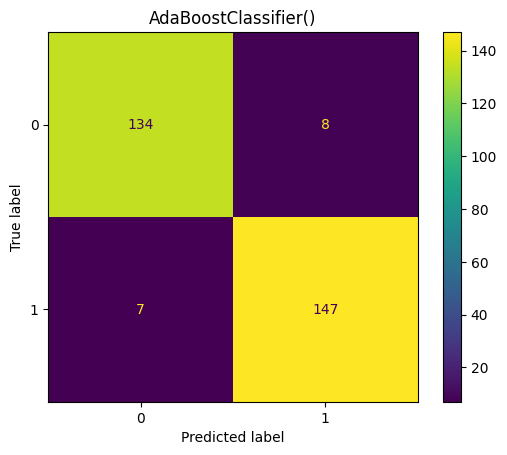

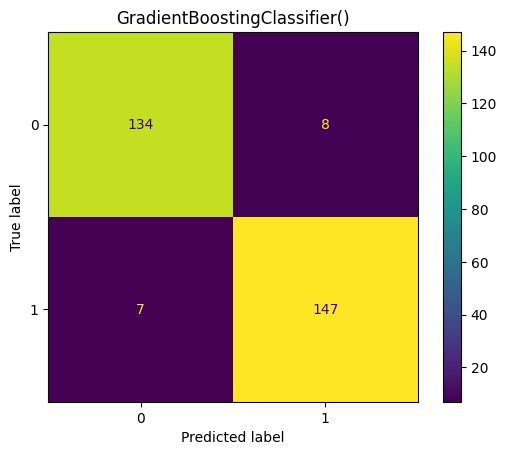

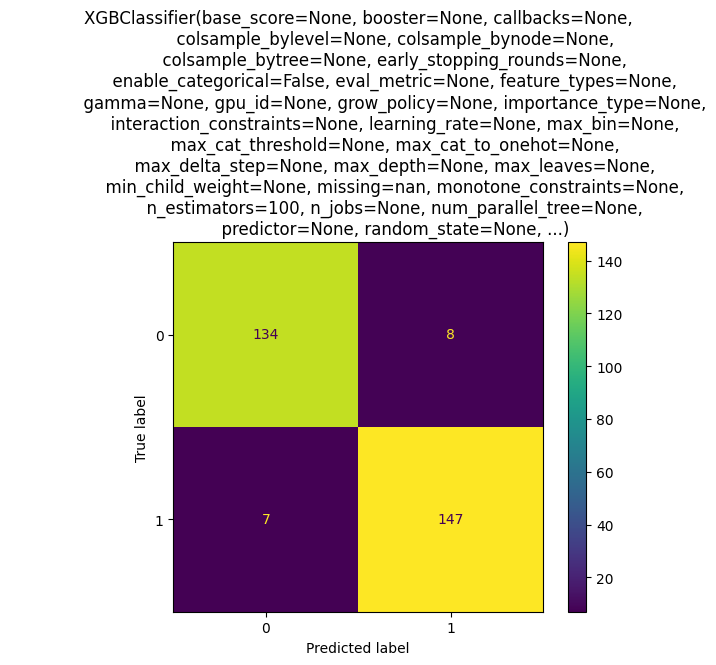

In [62]:
ab=AdaBoostClassifier()
gb=GradientBoostingClassifier()
xb=XGBClassifier()
models=[ab,gb,xb]
for model in models:
  print("#"*20,model,"#"*20)
  model.fit(X_train_us,y_train_us)
  y_pred_os=model.predict(X_test_us)
  print("accuracy=",accuracy_score(y_test_us,y_pred_us)*100)
  new_row_us = pd.Series([model,accuracy_score(y_test_us,y_pred_us)*100], index=modelPerformance_us.columns)
  modelPerformance_us = modelPerformance_us.append(new_row_us, ignore_index=True)
  print(classification_report(y_test_us,y_pred_us))
  cm = confusion_matrix(y_test_us, y_pred_us, labels=model.classes_)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
  disp.plot()
  disp.ax_.set_title(model)

In [63]:
modelPerformance_us=modelPerformance_us.sort_values(['Prediction_Accuracy'],axis=0, ignore_index=True,ascending=False)
modelPerformance_us.style.highlight_max(subset=['Prediction_Accuracy'],color='green')

,Algorithm,Prediction_Accuracy
0,SVC(),97.297297
1,KNeighborsClassifier(n_neighbors=3),96.959459
2,GaussianNB(),96.283784
3,DecisionTreeClassifier(criterion='entropy'),94.932432
4,AdaBoostClassifier(),94.932432
5,GradientBoostingClassifier(),94.932432
6,"XGBClassifier(base_score=None, booster=None, callbacks=None, colsample_bylevel=None, colsample_bynode=None, colsample_bytree=None, early_stopping_rounds=None, enable_categorical=False, eval_metric=None, feature_types=None, gamma=None, gpu_id=None, grow_policy=None, importance_type=None, interaction_constraints=None, learning_rate=None, max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=None, max_depth=None, max_leaves=None, min_child_weight=None, missing=nan, monotone_constraints=None, n_estimators=100, n_jobs=None, num_parallel_tree=None, predictor=None, random_state=None, ...)",94.932432


In [64]:
modelPerformance_us.style.highlight_min(subset=['Prediction_Accuracy'],color='red')

,Algorithm,Prediction_Accuracy
0,SVC(),97.297297
1,KNeighborsClassifier(n_neighbors=3),96.959459
2,GaussianNB(),96.283784
3,DecisionTreeClassifier(criterion='entropy'),94.932432
4,AdaBoostClassifier(),94.932432
5,GradientBoostingClassifier(),94.932432
6,"XGBClassifier(base_score=None, booster=None, callbacks=None, colsample_bylevel=None, colsample_bynode=None, colsample_bytree=None, early_stopping_rounds=None, enable_categorical=False, eval_metric=None, feature_types=None, gamma=None, gpu_id=None, grow_policy=None, importance_type=None, interaction_constraints=None, learning_rate=None, max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=None, max_depth=None, max_leaves=None, min_child_weight=None, missing=nan, monotone_constraints=None, n_estimators=100, n_jobs=None, num_parallel_tree=None, predictor=None, random_state=None, ...)",94.932432


# **Conclusion**

In [65]:
modelPerformance

,Algorithm,Prediction_Accuracy
0,SVC(),99.920000
1,KNeighborsClassifier(n_neighbors=3),99.893333
2,"XGBClassifier(base_score=None, booster=None, c...",99.886667
3,DecisionTreeClassifier(criterion='entropy'),99.820000
4,"(DecisionTreeClassifier(max_depth=1, random_st...",99.800000
5,([DecisionTreeRegressor(criterion='friedman_ms...,99.746667
6,GaussianNB(),99.733333


**Over sampling Accuracy**

In [66]:
modelPerformance_os

,Algorithm,Prediction_Accuracy
0,"KNeighborsClassifier(n_neighbors=3, weights='d...",99.949503
1,"XGBClassifier(base_score=None, booster=None, c...",99.942771
2,DecisionTreeClassifier(criterion='entropy'),99.781182
3,([DecisionTreeRegressor(criterion='friedman_ms...,99.468103
4,SVC(),99.198788
5,"(DecisionTreeClassifier(max_depth=1, random_st...",99.185322
6,GaussianNB(),97.424676


**Under sampling Accuracy**

In [67]:
modelPerformance_us

,Algorithm,Prediction_Accuracy
0,SVC(),97.297297
1,KNeighborsClassifier(n_neighbors=3),96.959459
2,GaussianNB(),96.283784
3,DecisionTreeClassifier(criterion='entropy'),94.932432
4,"(DecisionTreeClassifier(max_depth=1, random_st...",94.932432
5,([DecisionTreeRegressor(criterion='friedman_ms...,94.932432
6,"XGBClassifier(base_score=None, booster=None, c...",94.932432


From this prediction accuracy we can say that the with over sampling data have
greater accuracy.


---

**KNeighborsClassifier** of **99.949503** accuracy
